In [1]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  1


In [3]:
from tensorflow.python.client import device_lib

In [4]:
#print(device_lib.list_local_devices())


In [5]:
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))

In [6]:
!pip install --upgrade pip
!pip install pandas as pd
!pip install numpy as np
!pip install keras

import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras



Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


In [7]:
!pip install imblearn
!pip install seaborn

In [8]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=6

config = tf.ConfigProto(device_count = {'GPU': 65 , 'CPU': 40} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

In [9]:
!rm -rf ./logs/

In [10]:
data_train=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_NA_NORMALIZACAO_2/RGB/1/Parâmetros_de_todos_para_validacao_20201026_1_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [11]:
data_train

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo.1,Desvio padrão do ângulo de flexão do joelho esquerdo.1,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.765,20.0,0,7.4637,0.0000,0.9766,0.000,0.000,0.00,0.6593,...,0.000000,46.125476,45.125476,41.449890,40.449890,0.000000,0.000000,0.000000,0.000000,0
1,1.765,20.0,0,2.8363,165.9123,0.9767,0.000,0.000,0.00,0.5438,...,40.494494,49.434189,37.140736,44.055560,33.232135,-48.213917,48.213917,0.000000,0.000000,0
2,1.765,20.0,0,2.1308,122.8705,0.9768,0.000,0.000,0.00,0.4848,...,37.533868,49.959544,32.177689,41.880423,29.025416,-52.830101,39.904129,0.000000,0.000000,0
3,1.765,20.0,0,1.7190,97.2662,0.9769,0.000,0.000,0.00,0.4484,...,33.788442,43.965565,31.177461,44.298684,26.407797,-49.560904,35.018818,0.000000,0.000000,0
4,1.765,20.0,0,1.5364,79.1112,0.9770,0.000,0.000,0.00,0.3960,...,30.914964,36.842840,32.614329,40.200068,25.790238,-51.070091,31.466882,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,1.765,20.0,0,1.6016,35.2774,0.9602,0.097,0.097,0.08,0.1418,...,57.811478,11.123410,11.542391,11.176518,9.008943,-0.012453,13.070804,0.847389,0.365942,5
6374,1.765,20.0,0,1.5983,35.1834,0.9602,0.097,0.097,0.08,0.1418,...,57.856452,11.119913,11.517172,11.259844,9.076410,0.022714,13.052693,0.847389,0.365942,5
6375,1.765,20.0,0,1.5981,34.9713,0.9602,0.097,0.097,0.08,0.1415,...,57.987785,11.194470,11.547009,11.216263,9.080446,0.044380,13.028128,0.847389,0.365942,5
6376,1.765,20.0,0,1.5949,34.7573,0.9602,0.097,0.097,0.08,0.1413,...,57.945179,11.167880,11.528904,11.177594,9.079562,0.030763,13.001277,0.847389,0.365942,5


In [12]:
data_test=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_NA_NORMALIZACAO_2/RGB/4/Parâmetros_de_todos_para_validacao_20201026_4_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [13]:
data_test

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo.1,Desvio padrão do ângulo de flexão do joelho esquerdo.1,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.765,20.0,0,4.7114,0.0000,0.0000,0.000,0.000,0.00,0.6593,...,0.000000,46.125476,45.125476,41.449890,40.449890,0.000000,0.000000,0.000000,0.000000,0
1,1.765,20.0,0,2.6784,156.6740,0.0000,0.000,0.000,0.00,0.5438,...,40.494494,49.434189,37.140736,44.055560,33.232135,-48.213917,48.213917,0.000000,0.000000,0
2,1.765,20.0,0,1.9959,115.0889,0.0000,0.000,0.000,0.00,0.4848,...,37.533868,49.959544,32.177689,41.880423,29.025416,-52.830101,39.904129,0.000000,0.000000,0
3,1.765,20.0,0,1.6321,92.3506,0.0000,0.000,0.000,0.00,0.4484,...,33.788442,43.965565,31.177461,44.298684,26.407797,-49.560904,35.018818,0.000000,0.000000,0
4,1.765,20.0,0,1.4922,76.8347,0.0000,0.000,0.000,0.00,0.3960,...,30.914964,36.842840,32.614329,40.200068,25.790238,-51.070091,31.466882,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,1.765,20.0,0,1.6407,35.0435,0.9602,0.097,0.097,0.08,0.1471,...,58.827607,11.741206,11.709110,11.138884,9.013744,-0.185727,12.815989,0.847389,0.365942,5
4151,1.765,20.0,0,1.6349,34.8739,0.9602,0.097,0.097,0.08,0.1476,...,58.974940,11.721134,11.689280,11.106350,9.009539,-0.194004,12.790240,0.847389,0.365942,5
4152,1.765,20.0,0,1.6272,34.6642,0.9602,0.097,0.097,0.08,0.1482,...,58.945914,11.787720,11.711676,11.085569,8.996991,-0.177758,12.766515,0.847389,0.365942,5
4153,1.765,20.0,0,1.6218,34.5036,0.9602,0.097,0.097,0.08,0.1487,...,59.105138,11.775342,11.689453,11.071217,8.981496,-0.185107,12.740952,0.847389,0.365942,5


In [14]:
dataset_train=data_train[['Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Simetria do comprimento de passo','Cadência','Movimento']]

In [15]:
dataset_train

,Velocidade média (m/s),Comprimento médio passada,Largura da passada,Simetria do comprimento de passo,Cadência,Movimento
0,7.4637,0.9766,0.6593,0.000000,0.0000,0
1,2.8363,0.9767,0.5438,0.000000,165.9123,0
2,2.1308,0.9768,0.4848,0.000000,122.8705,0
3,1.7190,0.9769,0.4484,0.000000,97.2662,0
4,1.5364,0.9770,0.3960,0.000000,79.1112,0
...,...,...,...,...,...,...
6373,1.6016,0.9602,0.1418,0.847389,35.2774,5
6374,1.5983,0.9602,0.1418,0.847389,35.1834,5
6375,1.5981,0.9602,0.1415,0.847389,34.9713,5
6376,1.5949,0.9602,0.1413,0.847389,34.7573,5


In [16]:
dataset_test=data_test[['Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Simetria do comprimento de passo','Cadência','Movimento']]

In [17]:
datasheet_train=dataset_train.values

In [18]:
datasheet_test=dataset_test.values

In [19]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import random
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

##np.random.shuffle(datasheet_train)
##np.random.shuffle(datasheet_val)



In [21]:
datasheet_train

array([[7.46370000e+00, 9.76600000e-01, 6.59300000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.83630000e+00, 9.76700000e-01, 5.43800000e-01, 0.00000000e+00,
        1.65912300e+02, 0.00000000e+00],
       [2.13080000e+00, 9.76800000e-01, 4.84800000e-01, 0.00000000e+00,
        1.22870500e+02, 0.00000000e+00],
       ...,
       [1.59810000e+00, 9.60200000e-01, 1.41500000e-01, 8.47389417e-01,
        3.49713000e+01, 5.00000000e+00],
       [1.59490000e+00, 9.60200000e-01, 1.41300000e-01, 8.47389417e-01,
        3.47573000e+01, 5.00000000e+00],
       [1.59460000e+00, 9.60200000e-01, 1.41200000e-01, 8.47389417e-01,
        3.46003000e+01, 5.00000000e+00]])

In [22]:
shuffle(datasheet_train)

array([[ 1.8012    ,  1.0676    ,  0.1719    ,  0.89614264, 75.0146    ,
         5.        ],
       [ 1.0815    ,  0.        ,  0.2281    ,  0.84812425, 39.3294    ,
         3.        ],
       [ 1.552     ,  1.0483    ,  0.1867    ,  0.91658109, 52.588     ,
         5.        ],
       ...,
       [ 1.4872    ,  0.9589    ,  0.1325    ,  0.89186761, 32.6055    ,
         3.        ],
       [ 0.9145    ,  0.        ,  0.2973    ,  0.70900677, 26.4895    ,
         0.        ],
       [ 2.4731    ,  1.0732    ,  0.1847    ,  0.69044568, 79.5659    ,
         0.        ]])

In [23]:
datasheet_test

array([[4.71140000e+00, 0.00000000e+00, 6.59300000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.67840000e+00, 0.00000000e+00, 5.43800000e-01, 0.00000000e+00,
        1.56674000e+02, 0.00000000e+00],
       [1.99590000e+00, 0.00000000e+00, 4.84800000e-01, 0.00000000e+00,
        1.15088900e+02, 0.00000000e+00],
       ...,
       [1.62720000e+00, 9.60200000e-01, 1.48200000e-01, 8.47389417e-01,
        3.46642000e+01, 5.00000000e+00],
       [1.62180000e+00, 9.60200000e-01, 1.48700000e-01, 8.47389417e-01,
        3.45036000e+01, 5.00000000e+00],
       [1.61630000e+00, 9.60200000e-01, 1.49200000e-01, 8.47389417e-01,
        3.43416000e+01, 5.00000000e+00]])

In [24]:
valores_linhas_train=datasheet_train[:,0:5]
valores_coluna_saida_train=datasheet_train[:,5]

In [25]:
valores_linhas_test=datasheet_test[:,0:5]
valores_coluna_saida_test=datasheet_test[:,5]

In [26]:
valores_linhas_train

array([[7.46370000e+00, 9.76600000e-01, 6.59300000e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.83630000e+00, 9.76700000e-01, 5.43800000e-01, 0.00000000e+00,
        1.65912300e+02],
       [2.13080000e+00, 9.76800000e-01, 4.84800000e-01, 0.00000000e+00,
        1.22870500e+02],
       ...,
       [1.59810000e+00, 9.60200000e-01, 1.41500000e-01, 8.47389417e-01,
        3.49713000e+01],
       [1.59490000e+00, 9.60200000e-01, 1.41300000e-01, 8.47389417e-01,
        3.47573000e+01],
       [1.59460000e+00, 9.60200000e-01, 1.41200000e-01, 8.47389417e-01,
        3.46003000e+01]])

In [27]:
valores_coluna_saida_train

array([0., 0., 0., ..., 5., 5., 5.])

In [28]:
valores_linhas_test



array([[4.71140000e+00, 0.00000000e+00, 6.59300000e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.67840000e+00, 0.00000000e+00, 5.43800000e-01, 0.00000000e+00,
        1.56674000e+02],
       [1.99590000e+00, 0.00000000e+00, 4.84800000e-01, 0.00000000e+00,
        1.15088900e+02],
       ...,
       [1.62720000e+00, 9.60200000e-01, 1.48200000e-01, 8.47389417e-01,
        3.46642000e+01],
       [1.62180000e+00, 9.60200000e-01, 1.48700000e-01, 8.47389417e-01,
        3.45036000e+01],
       [1.61630000e+00, 9.60200000e-01, 1.49200000e-01, 8.47389417e-01,
        3.43416000e+01]])

In [29]:
valores_coluna_saida_test

array([0., 0., 0., ..., 5., 5., 5.])

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sn

nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

In [31]:
valores_linhas_train, valores_coluna_saida_train = smt.fit_sample(valores_linhas_train, valores_coluna_saida_train)

In [32]:
#valores_linhas_val, valores_coluna_saida_val = smt.fit_sample(valores_linhas_val, valores_coluna_saida_val)


In [33]:
!pip3 install sklearn 
import sklearn as sk
from sklearn import preprocessing

#min_max_escalar=preprocessing.MinMaxScaler()
#X_normalizado=min_max_escalar.fit_transform(valores_linhas)


# StratifieldShufflerSplit
### Quando se usa o mesmo dataset tanto para o treino e para a validação na proporção de 70/30

In [34]:
#StratifieldShufflerSplit
sss = StratifiedShuffleSplit(n_splits=6, test_size=0.3, random_state=1)
for train_index, test_index in sss.split(valores_linhas_train,valores_coluna_saida_train):
    X_train, X_test = valores_linhas_train[train_index], valores_linhas_train[test_index]
    Y_train, Y_test = valores_coluna_saida_train[train_index], valores_coluna_saida_train[test_index]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras



# Para o treino com um dataset e  validação com o de 4 ciclos


In [36]:
#X_train, X_test, Y_train, Y_test =valores_linhas_train,valores_linhas_test,valores_coluna_saida_train,valores_coluna_saida_test
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25) # test_size é o percentual do dataset que vai ser usado nas amostras


In [37]:
X_train.shape

(10069, 5)

In [38]:
X_val.shape

(2518, 5)

In [39]:
X_test.shape

(5395, 5)

In [40]:
len(X_train)

10069

In [41]:
len(Y_train)


10069

In [42]:
len(X_val)

2518

In [43]:
len(Y_val)

2518

In [44]:
len(X_test)

5395

In [45]:
len(Y_test)

5395

In [46]:
!pip3 install sklearn 
import sklearn as sk
from sklearn import preprocessing

min_max_escalar=preprocessing.StandardScaler()  # MinMaxScaler()
X_train=min_max_escalar.fit_transform(X_train)
X_test=min_max_escalar.fit_transform(X_test)
X_val=min_max_escalar.fit_transform(X_val)


In [47]:
X_train

array([[-0.13545677,  0.27653973, -0.07869391, -0.18714069,  0.38426281],
       [ 0.52825497, -2.06611097,  1.64170522, -1.30625334,  1.22946379],
       [-0.3494737 ,  0.44080944, -0.56950232, -0.22034322, -0.64307353],
       ...,
       [ 5.29295864, -2.06611097,  4.58854771,  0.45840005, -2.13924795],
       [-0.65460232, -1.89633721,  2.00253498, -0.41862223, -0.32040182],
       [-1.05527905, -2.06611097, -0.05784269,  0.94290786, -1.26396049]])

In [48]:
X_val

array([[ 0.18898963,  0.47937799, -0.78493929,  0.48401251, -0.07436153],
       [-0.37190334,  0.4872578 ,  0.30150739,  0.45669653,  0.14782589],
       [-0.25389696, -2.03921624,  1.9162272 , -1.8998209 ,  1.05201408],
       ...,
       [ 0.23097218,  0.34948942, -0.69552114, -0.27492516, -0.28760024],
       [-0.13149093,  0.32607146, -0.94066116,  0.44482471,  0.06790664],
       [-0.23191899,  0.52938584,  0.05716142,  0.41303186,  1.32912147]])

In [49]:
X_test

array([[-1.42914374e-01,  3.23475434e-01, -4.58778642e-01,
        -4.36457950e-01,  3.46737856e-04],
       [ 4.27089701e-01,  3.26931075e-01, -8.54402512e-01,
         5.63528667e-01,  5.79352555e-01],
       [ 9.05638456e-01, -2.12446513e+00, -1.73369915e-01,
        -2.81814166e+00,  1.81256232e-01],
       ...,
       [ 8.74315918e-02,  2.10118204e-01,  4.75953903e-01,
        -5.90701890e-01,  4.98275432e-01],
       [ 2.86931125e-01,  4.15670673e-01, -5.94847895e-01,
         1.14536339e-01,  4.66635349e-01],
       [-4.49780007e-02,  4.54163428e-01, -1.05668450e-01,
         6.81607283e-01, -3.29706267e-01]])

In [50]:
#%reload_ext tensorboard

In [51]:
#!rm -rf ./logs/ 

In [52]:
#X_train=X_train.reshape([-1,1, 5])
#X_val=X_val.reshape([-1,1, 5])

In [53]:
# %load_ext tensorboard

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential([
    Dense(200, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.00175)),
    Dropout(0.3),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.3),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    #Dropout(0.3),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    Dropout(0.3),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.000175),activation='relu'),
    #Dropout(0.3),
    Dense(200, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.3),
##    Dense(200, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.00175)),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.000175),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
##    Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    Dense(6, activation='softmax')
])
#model = Sequential([
#   Dense(350, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.000175)),
#    Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.3),
#    Dense(1, activation='sigmoid'),
#])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              804000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4000)              16004000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               8

In [56]:
import time

In [57]:
tempo_inicial=time.time()

In [58]:
model.compile(optimizer=RMSprop(),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])


##model.compile(optimizer='RMSprop',
##              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
##              metrics=['mse','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])

#NAME=("Model-of-{}",int(time.time()))
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [59]:
class_weight = {
    0: 1.0,#4.87,
    1: 1.0,#3.639,
    2: 1.0,#5.726,
    3: 1.0,#3.7615,
    4: 1.0,#4.85946,
    5: 1.0,
}

In [60]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=10)

historico = model.fit(X_train, Y_train,class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=1000,
          validation_data=(X_val, Y_val),callbacks=[es])

Train on 10069 samples, validate on 2518 samples
Epoch 1/1000
10064/10069 [============================>.] - ETA: 0s - loss: 1.3165 - mean_absolute_error: 2.3950 - acc: 0.6173WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
10069/10069 [==============================] - 20s 2ms/sample - loss: 1.3164 - mean_absolute_error: 2.3947 - acc: 0.6173 - val_loss: 1.1898 - val_mean_absolute_error: 2.3663 - val_acc: 0.6295
Epoch 2/1000
10069/10069 [==============================] - 19s 2ms/sample - loss: 0.9428 - mean_absolute_error: 2.3947 - acc: 0.7191 - val_loss: 0.8457 - val_mean_absolute_error: 2.3663 - val_acc: 0.7514
Epoch 3/1000
10069/10069 [==============================] - 19s 2ms/sample

10069/10069 [==============================] - 19s 2ms/sample - loss: 0.6671 - mean_absolute_error: 2.3947 - acc: 0.8121 - val_loss: 0.6295 - val_mean_absolute_error: 2.3663 - val_acc: 0.8122
Epoch 39/1000
10069/10069 [==============================] - 19s 2ms/sample - loss: 0.6510 - mean_absolute_error: 2.3947 - acc: 0.8230 - val_loss: 0.5533 - val_mean_absolute_error: 2.3663 - val_acc: 0.8439
Epoch 40/1000
10069/10069 [==============================] - 19s 2ms/sample - loss: 0.6677 - mean_absolute_error: 2.3947 - acc: 0.8134 - val_loss: 0.5456 - val_mean_absolute_error: 2.3663 - val_acc: 0.8511
Epoch 00040: early stopping


In [61]:
print("Tempo em segundos do processo de treino usando ", str(time.time()-tempo_inicial) + "s" )

Tempo em segundos do processo de treino usando  784.282518863678s


In [62]:
#print("Tempo em segundos usando " + str(per_process_gpu_memory_fraction*100) +  " % da GPU: ", str(time.time()-tempo_inicial) + "s" )

In [63]:
model.evaluate(X_val,Y_val)

[0.5456161882027072, 2.3662963, 0.85107225]

In [64]:
    model.evaluate(X_test,Y_test)

[0.5024097165318967, 2.3886, 0.86839664]

In [65]:
import matplotlib.pyplot as plot

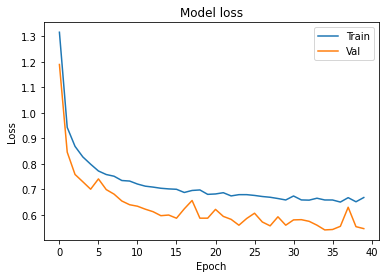

In [66]:
plot.plot(historico.history['loss'])
plot.plot(historico.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Perdas_6_movimentos.png")
plot.show()

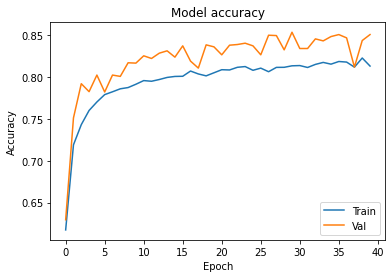

In [67]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Acuracia_6_movimentos.png")
plt.show()

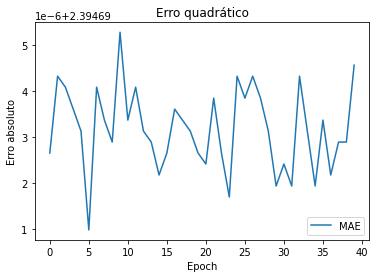

In [68]:
#Erro 
plot.plot(historico.history['mean_absolute_error'])
#plot.plot(historico.history['mean_squared_error'])
plot.title('Erro quadrático')
plot.ylabel('Erro absoluto')
plot.xlabel('Epoch')
plot.legend(['MAE'], loc='lower right')
plt.savefig("Erro_quadratico_6_movimentos.png")
plot.show()

In [69]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2/assets


In [70]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_Pred)


array([[862,   1,   4,  21,   0,  11],
       [ 67, 829,   0,   1,   0,   3],
       [189,   2, 663,  45,   0,   0],
       [155,   7,  25, 705,   7,   0],
       [149,   4,   3,  47, 651,  45],
       [ 43,  49,   2,  26,   0, 779]])

In [73]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(24,24)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

Normalized confusion matrix


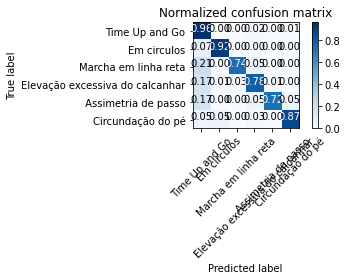

In [74]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("Matrix Confusao Normalizada.png")
plt.show()

Confusion matrix, without normalization


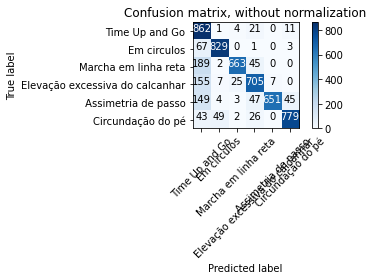

In [75]:
# Plot non-normalized confusion matrix
plt.figure()
plt.savefig("Matrix Confusao.png")
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS,title='Confusion matrix, without normalization',normalize=False)
plt.show()

In [76]:
from sklearn.metrics import classification_report

In [77]:

print(classification_report(Y_test,y_Pred,digits=5, target_names=CATEGORIAS))


                                 precision    recall  f1-score   support

                 Time Up and Go    0.58840   0.95884   0.72927       899
                    Em circulos    0.92937   0.92111   0.92522       900
           Marcha em linha reta    0.95122   0.73749   0.83083       899
Elevação excessiva do calcanhar    0.83432   0.78420   0.80849       899
            Assimetria de passo    0.98936   0.72414   0.83622       899
              Circundação do pé    0.92959   0.86652   0.89695       899

                       accuracy                        0.83207      5395
                      macro avg    0.87038   0.83205   0.83783      5395
                   weighted avg    0.87039   0.83207   0.83785      5395



In [78]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROC_E_AUC(y_Pred,Y_val):
    lw=2
    n_classes=6
    # Binarize the output
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    n_classes = Y_val.shape[1]

    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_Pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_Pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    #plt.savefig("Curva_ROC_6_movimentos_RGB_8/4_CICLOS.png")
    plt.show()
    print(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


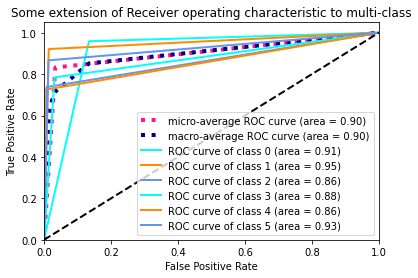

{0: 0.912361970991889, 1: 0.9535477691261897, 2: 0.8649619090408877, 3: 0.8765329409110163, 4: 0.8612904957663516, 5: 0.9266977889628254, 'micro': 0.8992400370713624, 'macro': 0.89923214579986}


In [79]:
ROC_E_AUC(y_Pred,Y_test)

In [80]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

def Average_Precision_Recall(Y_val,y_Pred):
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])

    # precision recall curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    average_precision_score=[]
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(Y_val[:, i],
                                                            y_Pred[:, i])
        #average_precision[i] = average_precision_score(Y_val[:, i], y_Pred[:, i])

        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_val.ravel(),
            y_Pred.ravel())
    #average_precision["micro"] = average_precision_score(Y_val, y_Pred,
    #                                                         average="micro")
    #print('Average precision score, micro-averaged over all classes: {0:0.2f}'
    #          .format(average_precision["micro"]))
    #plt.suptitle(
    #    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    #    .format(average_precision["micro"]))
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    #plt.savefig("Curva_precision vs. recall_movimentos_FOLD_5_RGB_1_CICLO -70_30.png")
    plt.show()

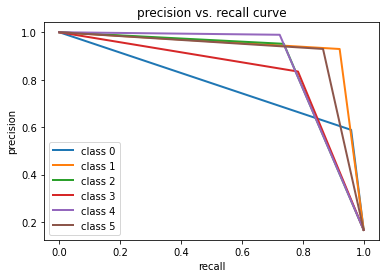

In [81]:
Average_Precision_Recall(Y_test,y_Pred)

In [82]:
##USANDO CROSS VALIDATION##

In [83]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((Y_train, Y_val), axis=0)

Train on 10069 samples, validate on 2518 samples
Epoch 1/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 1.1660 - mean_absolute_error: 2.3965 - acc: 0.6378 - val_loss: 0.8002 - val_mean_absolute_error: 2.3663 - val_acc: 0.7661
Epoch 2/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.8404 - mean_absolute_error: 2.3965 - acc: 0.7406 - val_loss: 0.7018 - val_mean_absolute_error: 2.3663 - val_acc: 0.7967
Epoch 3/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.7583 - mean_absolute_error: 2.3965 - acc: 0.7732 - val_loss: 0.6941 - val_mean_absolute_error: 2.3663 - val_acc: 0.8078
Epoch 4/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.6959 - mean_absolute_error: 2.3965 - acc: 0.7980 - val_loss: 0.6032 - val_mean_absolute_error: 2.3663 - val_acc: 0.8328
Epoch 5/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.6829 - mean_absolute_error: 2.3965 - acc: 0.8045 - 

Epoch 41/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.4505 - mean_absolute_error: 2.3965 - acc: 0.8812 - val_loss: 0.3642 - val_mean_absolute_error: 2.3663 - val_acc: 0.9134
Epoch 42/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.4395 - mean_absolute_error: 2.3965 - acc: 0.8839 - val_loss: 0.3677 - val_mean_absolute_error: 2.3663 - val_acc: 0.9071
Epoch 43/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.4401 - mean_absolute_error: 2.3965 - acc: 0.8811 - val_loss: 0.3616 - val_mean_absolute_error: 2.3663 - val_acc: 0.9098
Epoch 44/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.4335 - mean_absolute_error: 2.3965 - acc: 0.8860 - val_loss: 0.3638 - val_mean_absolute_error: 2.3663 - val_acc: 0.9079
Epoch 45/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.4367 - mean_absolute_error: 2.3965 - acc: 0.8827 - val_loss: 0.3574 - val_mean_absolute_error: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


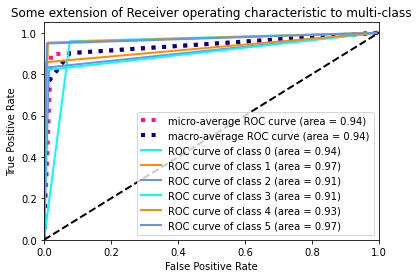

{0: 0.9409429318459815, 1: 0.9704381411444816, 2: 0.9092341134277311, 3: 0.9055628238572712, 4: 0.9263631694369783, 5: 0.9697450755881386, 'micro': 0.9370528266913809, 'macro': 0.9370477092167638}
Train on 10069 samples, validate on 2518 samples
Epoch 1/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 1.1550 - mean_absolute_error: 2.3858 - acc: 0.6355 - val_loss: 0.9060 - val_mean_absolute_error: 2.3663 - val_acc: 0.7085
Epoch 2/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.8438 - mean_absolute_error: 2.3858 - acc: 0.7449 - val_loss: 0.7027 - val_mean_absolute_error: 2.3663 - val_acc: 0.7748
Epoch 3/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.7600 - mean_absolute_error: 2.3858 - acc: 0.7744 - val_loss: 0.6649 - val_mean_absolute_error: 2.3663 - val_acc: 0.8225
Epoch 4/100
10069/10069 [==============================] - 14s 1ms/sample - loss: 0.7187 - mean_absolute_error: 2.3858 - acc: 0.7914 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


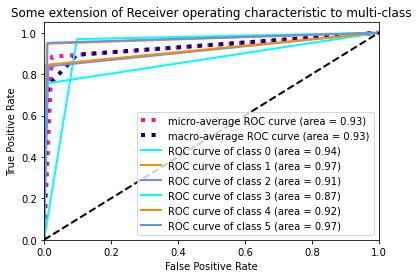

{0: 0.9354947569264387, 1: 0.9692176492398962, 2: 0.9124596972120069, 3: 0.8735270555658916, 4: 0.9211348166606629, 5: 0.9704127064868439, 'micro': 0.9303799814643189, 'macro': 0.9303744470152902}
Train on 10070 samples, validate on 2518 samples
Epoch 1/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 1.1553 - mean_absolute_error: 2.3896 - acc: 0.6357 - val_loss: 0.8178 - val_mean_absolute_error: 2.3663 - val_acc: 0.7494
Epoch 2/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.8410 - mean_absolute_error: 2.3896 - acc: 0.7380 - val_loss: 0.7251 - val_mean_absolute_error: 2.3663 - val_acc: 0.7812
Epoch 3/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.7621 - mean_absolute_error: 2.3896 - acc: 0.7735 - val_loss: 0.7302 - val_mean_absolute_error: 2.3663 - val_acc: 0.7768
Epoch 4/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.7124 - mean_absolute_error: 2.3896 - acc: 0.7935 - val_los

Epoch 40/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.4488 - mean_absolute_error: 2.3896 - acc: 0.8813 - val_loss: 0.3640 - val_mean_absolute_error: 2.3663 - val_acc: 0.9075
Epoch 41/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.4467 - mean_absolute_error: 2.3896 - acc: 0.8836 - val_loss: 0.3663 - val_mean_absolute_error: 2.3663 - val_acc: 0.8971
Epoch 42/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.4469 - mean_absolute_error: 2.3896 - acc: 0.8781 - val_loss: 0.3657 - val_mean_absolute_error: 2.3663 - val_acc: 0.9055
Epoch 43/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.4397 - mean_absolute_error: 2.3896 - acc: 0.8828 - val_loss: 0.3592 - val_mean_absolute_error: 2.3663 - val_acc: 0.9079
Epoch 44/100
10070/10070 [==============================] - 14s 1ms/sample - loss: 0.4438 - mean_absolute_error: 2.3896 - acc: 0.8787 - val_loss: 0.3924 - val_mean_absolute_error: 

In [ ]:
from sklearn.model_selection import KFold
num_folds=5

kfold = KFold(n_splits=num_folds, shuffle=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=10)

fold_no = 1
for train, test in kfold.split(inputs, targets):
    model = Sequential([
    Dense(200, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    Dropout(0.3),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    Dropout(0.3),
    Dense(200, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    Dropout(0.3),
    #Dense(200, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    Dense(6, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])
    ##historico = model.fit(inputs[train], targets[train],
    ##      batch_size=64, epochs=1000,callbacks=[es])
    historico= model.fit(inputs[train], targets[train],class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val),callbacks=[es])
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[2]} of {scores[2]*100}%')
    acc_per_fold.append(scores[2] * 100)
    loss_per_fold.append(scores[0])
    model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')
    load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')
    y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
    y_pred=(np.around(y_pred))
#print(y_pred)
    y_Pred=[]
    for i in range(0,len(y_pred)):
        #print(np.argmax(y_pred[i]))
        y_Pred.append(np.argmax(y_pred[i]))
    print(classification_report(Y_test,y_Pred,digits=5))
    ROC_E_AUC(y_Pred,Y_test)
    fold_no = fold_no + 1


In [ ]:
y_pred = load_model.predict(X_val)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))

In [ ]:

print(classification_report(Y_val,y_Pred,digits=5, target_names=CATEGORIAS))


In [ ]:
#X_normalizado.shape

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

In [ ]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

In [ ]:
# Plot normalized confusion matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - CROSS VALIDATION - FOLD 5- RGB - 8 CICLOS-70_30')
plt.savefig("Matrix Confusao Normalizada CROSS VALIDATION - FOLD 5'.png")
plt.show()

In [ ]:
Average_Precision_Recall(Y_test,y_Pred)

In [ ]:
##TERMINEI DE USAR O CROSS VALIDATION##

In [ ]:
data_validation=pd.read_csv('Parâmetros_de_todos_para_validacao.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos_para_validacao.csv')


In [ ]:
data_validation

In [ ]:
dataset_validation=data_validation[['Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Simetria do comprimento de passo','Cadência','Movimento']]

In [ ]:
dataset_validation

In [ ]:
datasheet_validation=dataset_validation.values

In [ ]:
valores_linhas_validation=datasheet_validation[:,0:5]

In [ ]:
X_normalizado_validacao=min_max_escalar.fit_transform(valores_linhas_validation)

In [ ]:
X_normalizado_validacao

In [ ]:
import numpy as np

In [ ]:
CATEGORIAS=["Time Up and Go","Em círculos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

for line in range(0,len(X_normalizado_validacao)):
    #print(X_normalizado_validacao[line])
    teste = X_normalizado_validacao[line].reshape([1,5])
    print(teste)
    prediction=load_model.predict(teste)
    print(prediction)
    prediction=(np.around(prediction).reshape([1,6]))
    print(prediction)
    print(CATEGORIAS[(np.argmax(prediction))])

In [ ]:
teste = [1.05364409,  0.88002339, 0.20362799,  0.80318584, 19.08771569] #X_normalizado_validacao[line].reshape([1,5])
teste=np.array(teste)
print(teste)
